In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# from tqdm import tqdm
import glob
import seaborn as sns
import cv2
import io

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
# import ipywidgets as widgets
from tensorflow.keras.utils import to_categorical

# architecture Pare
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
labels = ["broadleaf", "grass", "soil", "soybean"]

In [17]:
X  =[] 
Y = [] 
image_size = (100, 110)

for i in labels:
    Datasetspath = "D:\\IIT Bhilai\\Semester V\\ML\\PP2\\dataset\\" + i + "\\"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))
    
    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

D:\IIT Bhilai\Semester V\ML\PP2\dataset\broadleaf\
1191
D:\IIT Bhilai\Semester V\ML\PP2\dataset\grass\
3520
D:\IIT Bhilai\Semester V\ML\PP2\dataset\soil\
3249
D:\IIT Bhilai\Semester V\ML\PP2\dataset\soybean\
7376


In [18]:
for i in labels:
    Datasetspath = "D:\\IIT Bhilai\\Semester V\\ML\\PP2\\dataset\\" + i + "\\"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])

D:\IIT Bhilai\Semester V\ML\PP2\dataset\broadleaf\
D:\IIT Bhilai\Semester V\ML\PP2\dataset\broadleaf\10.tif
D:\IIT Bhilai\Semester V\ML\PP2\dataset\grass\
D:\IIT Bhilai\Semester V\ML\PP2\dataset\grass\10.tif
D:\IIT Bhilai\Semester V\ML\PP2\dataset\soil\
D:\IIT Bhilai\Semester V\ML\PP2\dataset\soil\10.tif
D:\IIT Bhilai\Semester V\ML\PP2\dataset\soybean\
D:\IIT Bhilai\Semester V\ML\PP2\dataset\soybean\10.tif


In [19]:
X.shape, Y.shape

((15336, 110, 100, 3), (15336,))

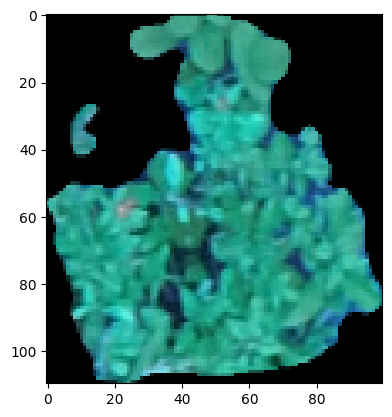

In [20]:
plt.imshow(X[0])

In [21]:
Y[0]

'broadleaf'

In [22]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [23]:
Y.shape

(15336, 4)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [25]:
X_train.shape,Y_train.shape

((10735, 110, 100, 3), (10735, 4))

In [26]:
X_test.shape,Y_test.shape

((4601, 110, 100, 3), (4601, 4))

In [27]:
model = Sequential()

#1st Layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu", input_shape=(110, 100, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))

#2nd Layer
model.add(Conv2D(16, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))

# 3rd Layer
model.add(Conv2D(8, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))

#4th Layer
model.add(Conv2D(4, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))


#fully Connected NN
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [29]:
model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [30]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30, batch_size = 2, verbose = 1)

Epoch 1/30
5368/5368 [==============================] - 70s 11ms/step - loss: 0.6407 - accuracy: 0.7464 - val_loss: 0.4343 - val_accuracy: 0.8405
Epoch 2/30
5368/5368 [==============================] - 60s 11ms/step - loss: 0.4172 - accuracy: 0.8394 - val_loss: 0.4304 - val_accuracy: 0.8274
Epoch 3/30
5368/5368 [==============================] - 61s 11ms/step - loss: 0.3554 - accuracy: 0.8577 - val_loss: 0.4144 - val_accuracy: 0.8370
Epoch 4/30
5368/5368 [==============================] - 61s 11ms/step - loss: 0.3154 - accuracy: 0.8756 - val_loss: 0.3154 - val_accuracy: 0.8763
Epoch 5/30
5368/5368 [==============================] - 61s 11ms/step - loss: 0.2838 - accuracy: 0.8874 - val_loss: 0.2903 - val_accuracy: 0.8802
Epoch 6/30
5368/5368 [==============================] - 61s 11ms/step - loss: 0.2591 - accuracy: 0.8963 - val_loss: 0.3522 - val_accuracy: 0.8566
Epoch 7/30
5368/5368 [==============================] - 61s 11ms/step - loss: 0.2395 - accuracy: 0.9052 - val_loss: 0.2800 -

Model Accuracy



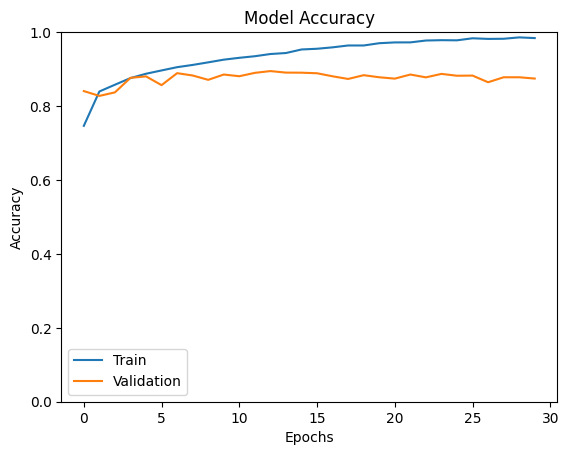

In [31]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



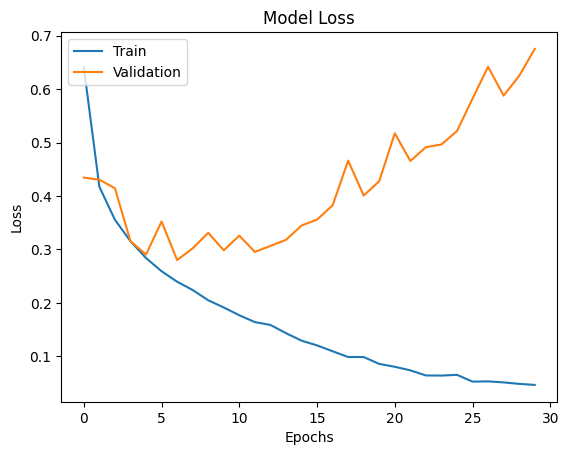

In [32]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()